In [204]:
import numpy as np
import pandas as pd 
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as stats
import cairo
import statistics as st
from network_tolerance_ig import *

In [323]:
df = pd.read_csv('./Renamed Data/Capital-bikeshare-2011.csv',
                 index_col=0)


In [324]:
#Instantiates CreateGraph class from network_tolerance_ig
cg = CreateGraph()
#Perform groupbys in the data and outputs processed df
processed = cg.preprocess(df)
#Create graph from processed df
g = cg.create_network(processed, directed=True)

In [325]:
#Measures to monitor as we delete nodes. Measures MUST BE a list or tuple

measures = ['diameter', 'average_path_length', 'is_connected']
measure_params = [{'directed':True}, {'directed':True},{'mode':'weak'}]
# =============================================================================
# measures = ['transitivity_avglocal_undirected', 'density']
# #parameters for each measure as a dictionary
# measure_params = [{'mode':'zero'}, {'loops':True}]
# =============================================================================

In [326]:
f=0.10
steps = round(f*g.vcount())

In [327]:
#Instantiates GraphTolerance class from network_tolerance_ig
g1 = g.copy()
tolerance1 = GraphTolerance(g1)
random_fail = tolerance1.random_fail(f=f, steps=steps, 
                         graph_measures=measures,
                         measure_params=measure_params)

random_fail = random_fail.add_suffix('_rf')

In [328]:
g2 = g.copy()
tolerance2 = GraphTolerance(g2)
centrality = 'degree'
centrality_params = {'loops':True}

target_attack_degree = tolerance2.target_attack(f=f, centrality=centrality, 
                                   centrality_params = centrality_params,
                         graph_measures=measures,
                         measure_params=measure_params)

target_attack_degree = target_attack_degree.add_suffix('_ta_d')


In [329]:
g3 = g.copy()
tolerance3 = GraphTolerance(g3)
centrality = 'betweenness'
centrality_params = {'directed':True}

target_attack_bet = tolerance3.target_attack(f=f, centrality=centrality, 
                                   centrality_params = centrality_params,
                         graph_measures=measures,
                         measure_params=measure_params)

target_attack_bet = target_attack_bet.add_suffix('_ta_bet')


# =============================================================================
# #%% Eccentricity Targeted Attack
# g2 = g.copy()
# tolerance2 = GraphTolerance(g2)
# centrality = 'pagerank'
# #centrality_params = {}
# centrality_params = {'mode': 'all'}
# 
# target_attack_pr = tolerance2.target_attack(f=0.05, centrality=centrality, 
#                                    centrality_params = centrality_params,\
#                                     steps= 20, 
#                          graph_measures=measures,
#                          measure_params=measure_params)
# 
# target_attack_pr = target_attack_pr.add_suffix('_ta_pr')
# =============================================================================

In [330]:
results = random_fail.join([target_attack_degree, target_attack_bet])

Text(0.5, 0, 'Fraction of Nodes Removed')

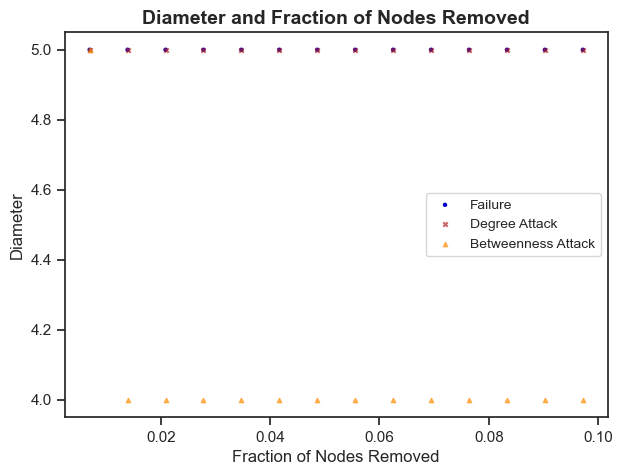

In [331]:
sns.set_theme(style = 'ticks', rc={'figure.dpi': 100})
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=results.f_rf, y=results.iloc[:,2], label='Failure', s=10,
            edgecolors='none', facecolors='mediumblue')
plt.scatter(x=results.f_ta_d, y=results.diameter_ta_d, label='Degree Attack', marker = 'x', s=10,
              facecolors='firebrick', alpha = 0.7)
plt.scatter(x=results.f_ta_bet, y=results.diameter_ta_bet, label='Betweenness Attack', marker = '^', s=10,
              facecolors='darkorange', alpha=0.6)
ax.legend(loc='center right',prop={'size':'small'})
ax.set_title('Diameter and Fraction of Nodes Removed', fontweight='bold', fontsize=14)
ax.set_ylabel('Diameter')
ax.set_xlabel('Fraction of Nodes Removed')


Text(0.5, 0, 'Fraction of Nodes Removed')

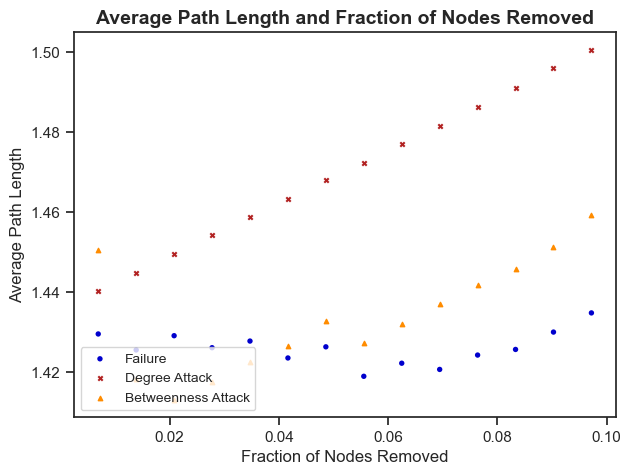

In [332]:
sns.set_theme(style = 'ticks', rc={'figure.dpi': 100})
fig, ax2 =plt.subplots(figsize=(7,5))
plt.scatter(x=results.f_rf, y=results.average_path_length_rf, label='Failure', s=15,
            edgecolors='none', facecolors='mediumblue')
plt.scatter(x=results.f_ta_d, y=results.average_path_length_ta_d, label='Degree Attack', marker = 'x', s=10,
              facecolors='firebrick')
plt.scatter(x=results.f_ta_bet, y=results.average_path_length_ta_bet, label='Betweenness Attack', marker = '^', s=10,
              facecolors='darkorange')
ax2.legend(loc='lower left',prop={'size':'small'})
#ax2.set_ybound(1.5, 2.2)
ax2.set_title('Average Path Length and Fraction of Nodes Removed', fontweight='bold', fontsize=14)
ax2.set_ylabel('Average Path Length')
ax2.set_xlabel('Fraction of Nodes Removed')
# =============================================================================

In [333]:
print(g.summary())
print(g1.summary())
print(g2.summary())
print(g3.summary())

IGRAPH DNW- 144 12066 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 130 9881 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 130 8874 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 130 9201 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)


In [334]:
results.to_csv('results_2011.csv')

In [335]:
#results[:-1]

In [336]:
for i in [g, g1, g2, g3]:
    print(i.is_connected(mode='weak'))

True
True
True
True


In [337]:
for i in g3.decompose():
    print(i.summary())

IGRAPH DNW- 1 1 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 1 1 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 1 0 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 1 0 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 124 9187 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), end

In [338]:
ig.plot(g3, vertex_size=2, edge_width = 0.2, edge_arrow_size=0.2, edge_curved=True)